In [1]:
from qiskit import *
from numpy.random import randint
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def bit_string(n):
    return randint(2, size = n)

In [3]:
def encode_bits1(bits, bases):
    base_encoding = []
    for bit, base in zip(bits, bases):
        base_circuit = QuantumCircuit(1, 1)
        if base == 0:
            if bit == 1:
                base_circuit.x(0)
        if base == 1:
            if bit == 0:
                base_circuit.h(0)
            if bit == 1:
                base_circuit.x(0)
                base_circuit.h(0)
        base_circuit.barrier()
        base_encoding.append(base_circuit)
    return base_encoding

In [4]:
def encode_bits(bits, bases):
    l = len(bits)
    base_circuit = QuantumCircuit(l, l)
    for i in range(l):
        if bases[i] == 0:
            if bits[i] == 1:
                base_circuit.x(i)
        if bases[i] == 1:
            if bits[i] == 0:
                base_circuit.h(i)
            if bits[i] == 1:
                base_circuit.x(i)
                base_circuit.h(i)
    return base_circuit

In [5]:
def measure_bits1(bits, bases):
    backend = Aer.get_backend('qasm_simulator')
    measured_bits = []
    for j in range(len(bits)):
        if bases[j] == 0:
            bits[j].measure(0,0)
        if bases[j] == 1:
            bits[j].h(0)
            bits[j].measure(0,0)
        result = execute(bits[j], backend, shots=1, memory = True).result()
        measured_bit = int(result.get_memory()[0])
        measured_bits.append(measured_bit)
    return measured_bits

In [22]:
def measure_bits(bits, bases):
    backend = Aer.get_backend('qasm_simulator')
    for j in range(len(bases)):
        if bases[j] == 0:
            bits.measure(j,j)
        if bases[j] == 1:
            bits.h(j)
            bits.measure(j,j)
    r = execute(bits, backend, shots=1, memory = True).result().get_counts()
    return bits, [int(ch) for ch in list(r.keys())[0]]

In [7]:
def agreed_bases(a, b):
    return [j for j in range(len(a)) if a[j] == b[j]]

In [8]:
def select_bits(bits, selection, test):
    return [i for i in range(len(selection)) if selection[i] == test]

In [9]:
def error_rate(atest, btest):
    W = len([j for j in range(len(atest)) if atest[j] != btest[j]])
    return W / len(atest)

In [10]:
def information_reconciliation(a, b):
    return a, b

In [11]:
def two_universalhash(a, b):
    return a, b

In [25]:
n = 3
N = 12

#Step 1 - Dev generates bits
alice_bits = bit_string(N)

#Step 2 - Dev generates the bases string
alice_bases = bit_string(N)

#Step 3 - Abhi generates the bases string
bob_bases = bit_string(N)

|Information|Dev|Kaal|Abhi|
|:-:|:-:|:-:|:-:|
|Dev's bits|Y|N|N|
|Dev's bases|Y|N|N|
|Abhi's bases|N|Y|N|

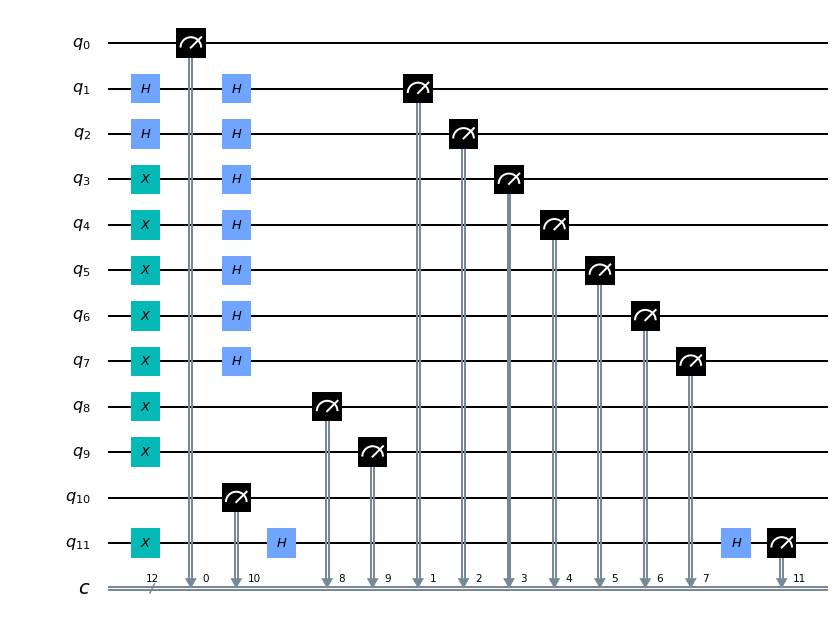

In [26]:
#Step 4 - Alice encodes her bits in the chosen bases 
alice_encode = encode_bits(alice_bits, alice_bases)

#Step 5 - Alice sends her encoded bits to Bob and Eve tries to intercept over the Quantum channel

#Step 6 - Bob measures Alics's bits in the chosen bases
bob_circuit, bob_bits = measure_bits(alice_encode, bob_bases)
#Step 7 - Bob announces that he has received the encoding and measured it over CAC

#Step 8 - Alice and Bob exchange their bases over CAC

#Step 9 - Alice and Bob discard all the bits that correspond to disagreed bases
agreed_base_indices = agreed_bases(alice_bases, bob_bases)
bob_circuit.draw(output = 'mpl')

|Information|Dev|Kaal|Abhi|
|:-:|:-:|:-:|:-:|
|Dev's Encoding|Y|Partial|Noisy|
|Abhi's bits|N|N|Y|
|Dev's and Abhi's bases|Y|Y|Y|

In [ ]:
#Step 10 - Error rate checking 
S2T = bit_string(len(agreed_base_indices))
T = select_bits(agreed_base_indices, S2T, 0)

#Step 11 - Alice tells T to bob over CAC

#Step 12 - Alice and Bob generate their test bits 
alice_test_bits = [alice_bits[i] for i in T]
bob_test_bits = [bob_bits[i] for i in T]

#Step 12 - Alice and Bob announce their test bits to each other over the CAC

#Step 13 - Alice and Bob compute the error rate
error = error_rate(alice_test_bits, bob_test_bits)

|Information|Dev|Kaal|Abhi|
|:-:|:-:|:-:|:-:|
|T|Y|Y|Y|
|Dev's test bits|Y|Y|Y|
|Abhi's test bits|Y|Y|Y|

In [ ]:
#Step 14 - Alice and Bob check over a threshold for error before proceeding ahead

#Step 15 - Alice and Bob generate their pseudo keys
SminusT = select_bits(agreed_base_indices, S2T, 1)
alice_pseudokey = [alice_bits[i] for i in SminusT]
bob_pseudokey = [bob_bits[i] for i in SminusT]

#Step 16 - Alice and Bob perform Information Reconciliation

#Step 17 - Alice and Bob perform privacy amplification

|Information|Dev|Kaal|Abhi|
|:-:|:-:|:-:|:-:|
|Pseudo key|Y|Partial|Noisy|